# Import Modules

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import xgboost as xgb
%matplotlib inline

# Loading the Dataset

In [3]:
df = pd.read_csv("Data_set (Final).csv")
df.head()

,Sr_no,Cases,Education,Applicant_Income,Family_Income,Total_assets,Business_type,Credit,Loan_Amount,Loan_Amount_Term,...,Competition,Rent_Wages,Size_Shop,Location,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status
0,1,1,Graduate,5849,0.0,0,Yes,Yes,NaN,360.0,...,3,1,3,0,3,6,4,0,0,Y
1,2,2,Graduate,4583,1508.0,3,No,Yes,128.0,360.0,...,0,5,0,0,5,1,1,1,1,N
2,3,0,Graduate,3000,0.0,0,No,Yes,66.0,360.0,...,1,4,0,5,5,2,3,4,1,Y
3,4,0,Not Graduate,2583,2358.0,2,Yes,No,120.0,360.0,...,0,3,2,5,3,7,4,5,1,Y
4,5,2,Graduate,6000,0.0,2,Yes,Yes,141.0,360.0,...,0,4,3,0,3,2,2,0,2,Y


In [4]:
df.describe()

,Sr_no,Cases,Applicant_Income,Family_Income,Total_assets,Loan_Amount,Loan_Amount_Term,Rating_Reviewportal,Daily_Sales,Competition,Rent_Wages,Size_Shop,Location,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature
count,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,1.973941,5403.459283,1621.245798,2.488599,146.412162,342.00000,2.473941,2.47557,2.612378,2.555375,2.421824,2.620521,2.532573,3.522801,2.586319,2.521173,2.359935
std,177.390811,1.388359,6109.041673,2926.248369,1.679655,85.587325,65.12041,1.642166,1.66194,1.750202,1.653321,1.748338,1.711958,1.669635,2.319919,1.625111,1.757401,1.701863
min,1.000000,0.000000,150.000000,0.000000,0.000000,9.000000,12.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.250000,1.000000,2877.500000,0.000000,1.000000,100.000000,360.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,307.500000,2.000000,3812.500000,1188.500000,3.000000,128.000000,360.00000,2.500000,3.00000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000
75%,460.750000,3.000000,5795.000000,2297.250000,4.000000,168.000000,360.00000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,4.000000,4.000000,4.000000
max,614.000000,4.000000,81000.000000,41667.000000,5.000000,700.000000,480.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,5.000000,5.000000,5.000000


In [5]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sr_no                614 non-null    int64  
 1   Cases                614 non-null    int64  
 2   Education            614 non-null    object 
 3   Applicant_Income     614 non-null    int64  
 4   Family_Income        614 non-null    float64
 5   Total_assets         614 non-null    int64  
 6   Business_type        614 non-null    object 
 7   Credit               614 non-null    object 
 8   Loan_Amount          592 non-null    float64
 9   Loan_Amount_Term     600 non-null    float64
 10  Rating_Reviewportal  614 non-null    int64  
 11  Daily_Sales          614 non-null    int64  
 12  Competition          614 non-null    int64  
 13  Rent_Wages           614 non-null    int64  
 14  Size_Shop            614 non-null    int64  
 15  Location             614 non-null    int

# Preprocessing the Dataset

In [7]:
# find the null values
df.isnull().sum()

Sr_no                   0
Cases                   0
Education               0
Applicant_Income        0
Family_Income           0
Total_assets            0
Business_type           0
Credit                  0
Loan_Amount            22
Loan_Amount_Term       14
Rating_Reviewportal     0
Daily_Sales             0
Competition             0
Rent_Wages              0
Size_Shop               0
Location                0
Supply                  0
Total_Workers           0
No_customers            0
Freq_Supply_pay         0
Nature                  0
Loan_Status             0
dtype: int64

In [8]:
# fill the missing values for numerical terms - mean
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [9]:
#check whether all null values are removed
df.isnull().sum()

Sr_no                  0
Cases                  0
Education              0
Applicant_Income       0
Family_Income          0
Total_assets           0
Business_type          0
Credit                 0
Loan_Amount            0
Loan_Amount_Term       0
Rating_Reviewportal    0
Daily_Sales            0
Competition            0
Rent_Wages             0
Size_Shop              0
Location               0
Supply                 0
Total_Workers          0
No_customers           0
Freq_Supply_pay        0
Nature                 0
Loan_Status            0
dtype: int64

<Axes: xlabel='Cases', ylabel='count'>

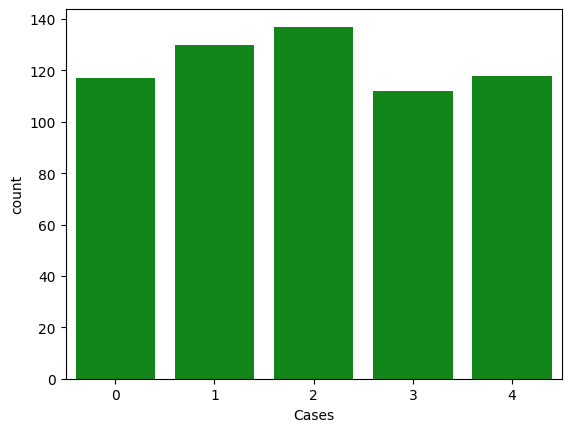

In [10]:
sns.countplot(x=df['Cases'], color='#009909')

<Axes: xlabel='Education', ylabel='count'>

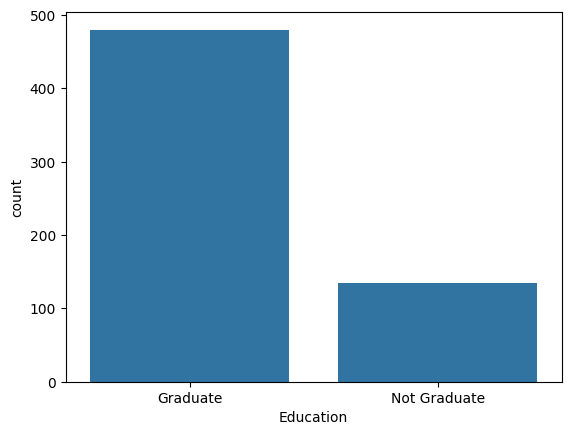

In [11]:
sns.countplot(x=df['Education'])

<Axes: xlabel='Total_assets', ylabel='count'>

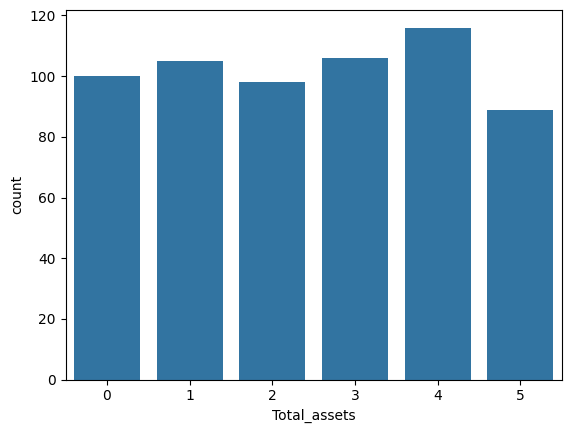

In [12]:
# rating
sns.countplot(x=df['Total_assets'])

<Axes: xlabel='Business_type', ylabel='count'>

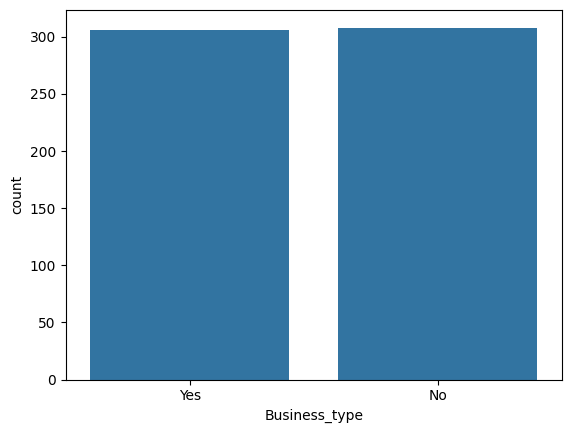

In [13]:
# yes / no
sns.countplot(x=df['Business_type'])

<Axes: xlabel='Credit', ylabel='count'>

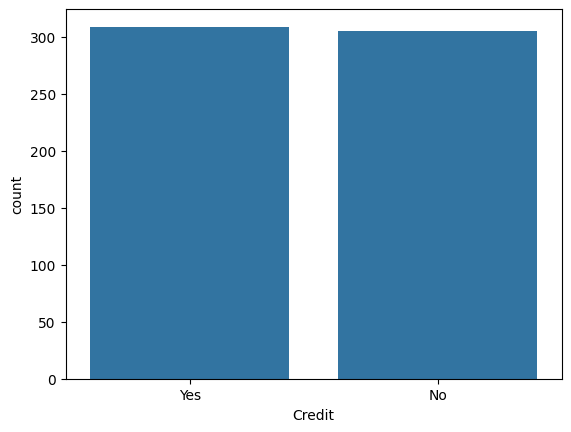

In [14]:
# yes / no
sns.countplot(x=df['Credit'])

<Axes: xlabel='Rating_Reviewportal', ylabel='count'>

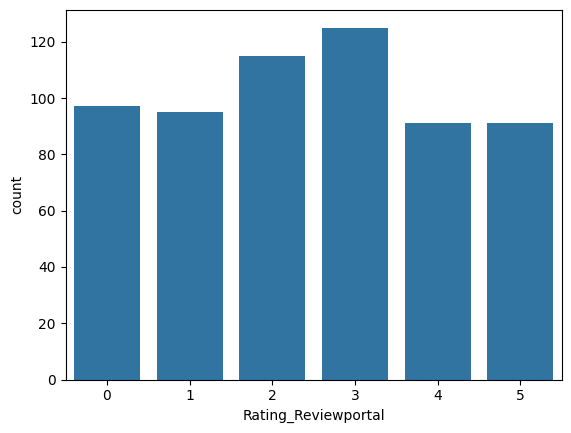

In [15]:
# rating
sns.countplot(x=df['Rating_Reviewportal'])

<Axes: xlabel='Daily_Sales', ylabel='count'>

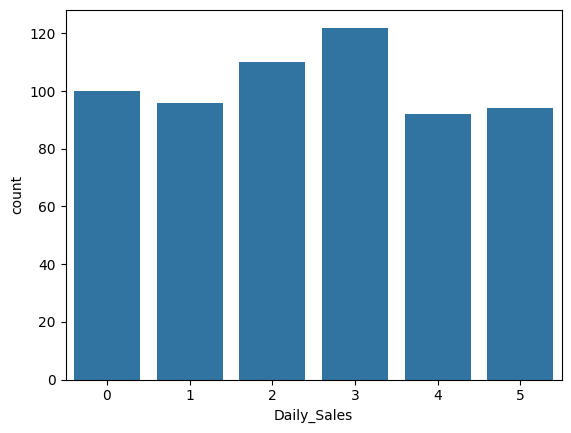

In [16]:
# rating
sns.countplot(x=df['Daily_Sales'])

<Axes: xlabel='Competition', ylabel='count'>

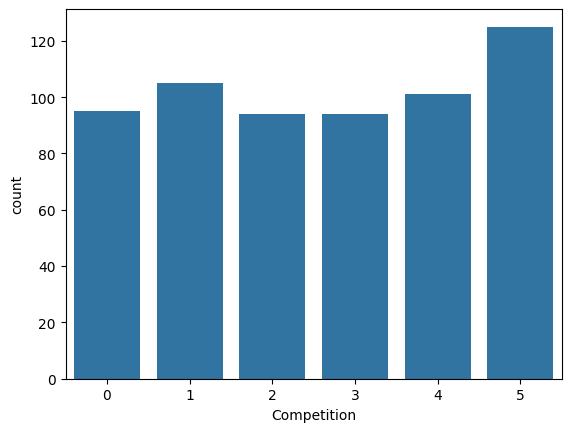

In [17]:
# rating
sns.countplot(x=df['Competition'])

<Axes: xlabel='Rent_Wages', ylabel='count'>

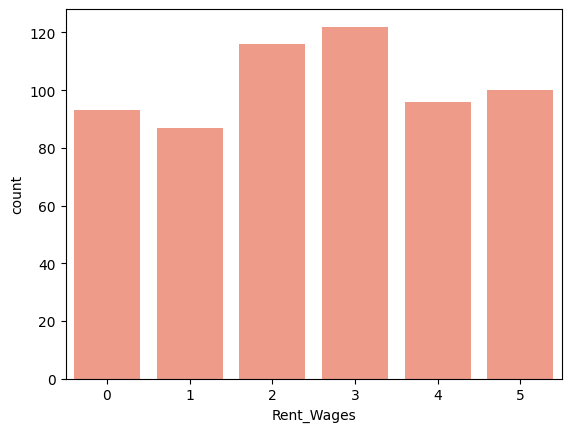

In [18]:
# rating
sns.countplot(x=df['Rent_Wages'], color='#FF9079')

<Axes: xlabel='Size_Shop', ylabel='count'>

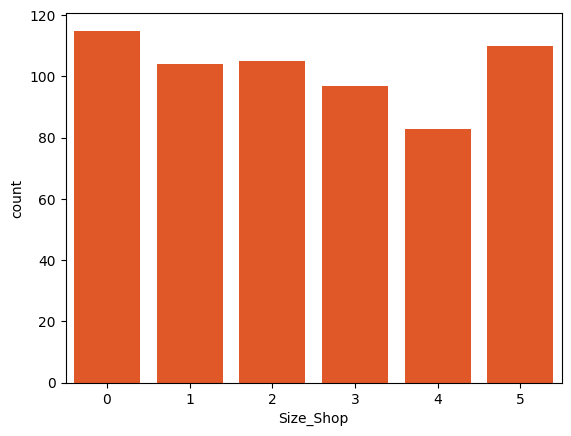

In [19]:
# rating
sns.countplot(x=df['Size_Shop'], color='#FF4909')

<Axes: xlabel='Location', ylabel='count'>

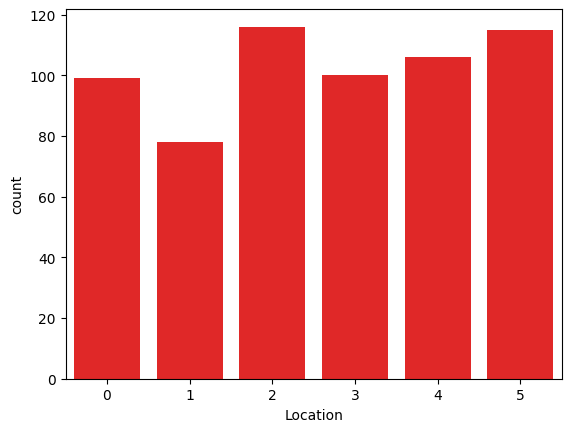

In [20]:
# rating
sns.countplot(x=df['Location'], color='#FF0909')

<Axes: xlabel='Supply', ylabel='count'>

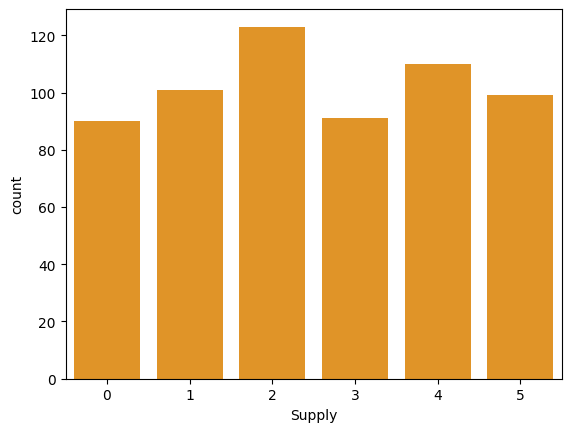

In [21]:
# rating
sns.countplot(x=df['Supply'], color='#FF9909')

<Axes: xlabel='Total_Workers', ylabel='count'>

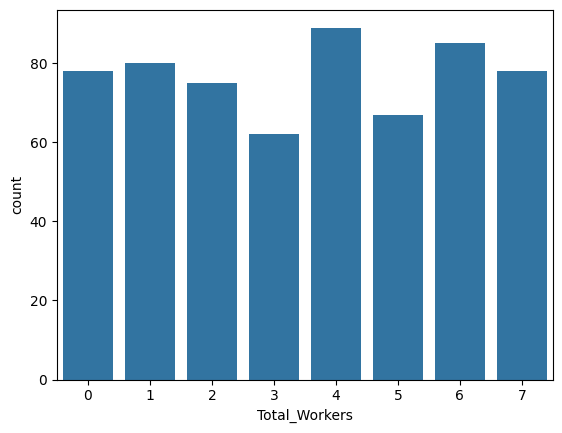

In [22]:
# value
sns.countplot(x=df['Total_Workers'])

<Axes: xlabel='No_customers', ylabel='count'>

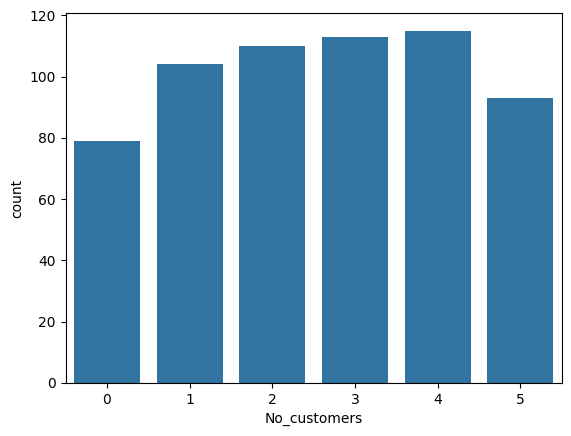

In [23]:
# rating
sns.countplot(x=df['No_customers'])

<Axes: xlabel='Freq_Supply_pay', ylabel='count'>

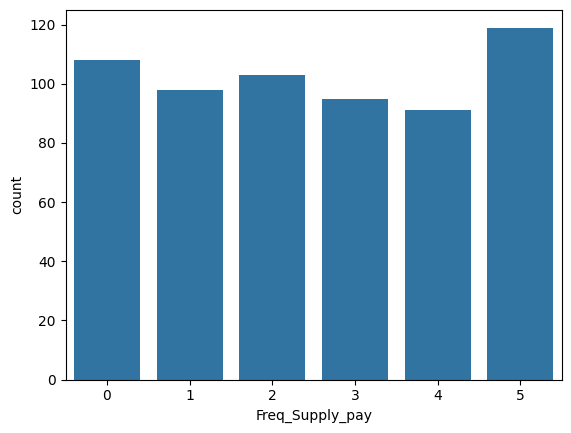

In [24]:
# rating
sns.countplot(x=df['Freq_Supply_pay'])

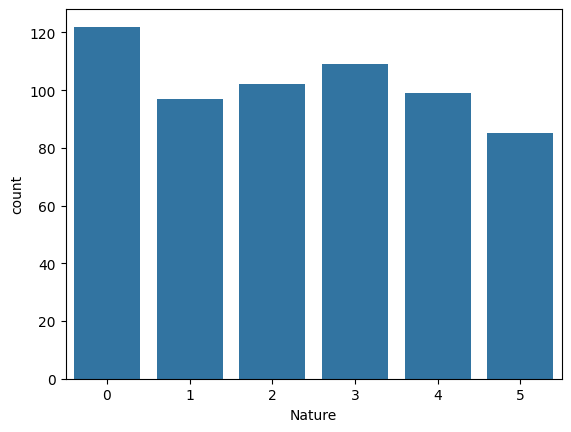

In [25]:
# rating
sns.countplot(x=df['Nature']);

<Axes: xlabel='Loan_Status', ylabel='count'>

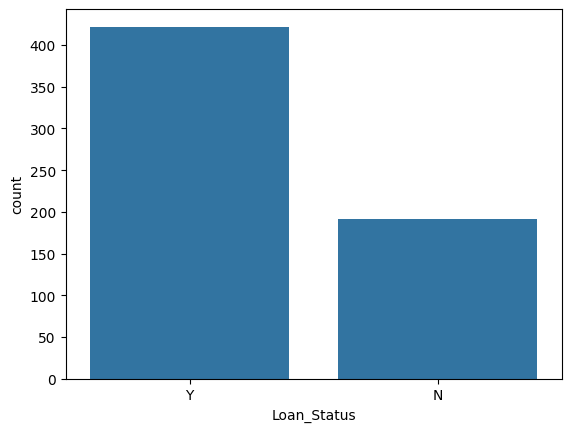

In [26]:
# target attribute
sns.countplot(x=df['Loan_Status'])

In [27]:
# total income
df['Total_Income'] = df['Applicant_Income'] + df['Family_Income']
df.head()

,Sr_no,Cases,Education,Applicant_Income,Family_Income,Total_assets,Business_type,Credit,Loan_Amount,Loan_Amount_Term,...,Rent_Wages,Size_Shop,Location,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status,Total_Income
0,1,1,Graduate,5849,0.0,0,Yes,Yes,146.412162,360.0,...,1,3,0,3,6,4,0,0,Y,5849.0
1,2,2,Graduate,4583,1508.0,3,No,Yes,128.000000,360.0,...,5,0,0,5,1,1,1,1,N,6091.0
2,3,0,Graduate,3000,0.0,0,No,Yes,66.000000,360.0,...,4,0,5,5,2,3,4,1,Y,3000.0
3,4,0,Not Graduate,2583,2358.0,2,Yes,No,120.000000,360.0,...,3,2,5,3,7,4,5,1,Y,4941.0
4,5,2,Graduate,6000,0.0,2,Yes,Yes,141.000000,360.0,...,4,3,0,3,2,2,0,2,Y,6000.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13552\3525102840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Applicant_Income_Log'], color='#FF2909');


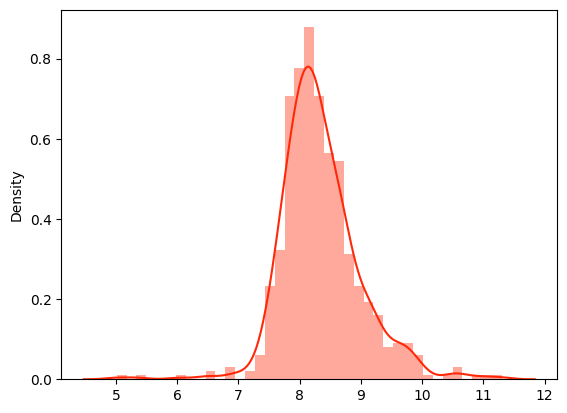

In [28]:
df['Applicant_Income_Log'] = np.log(df['Applicant_Income']);
sns.distplot(x=df['Applicant_Income_Log'], color='#FF2909');

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13552\1387679870.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount'])


<Axes: xlabel='Loan_Amount', ylabel='Density'>

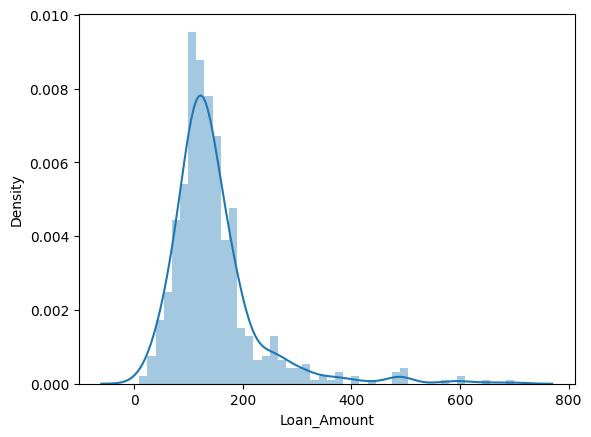

In [29]:
df['Loan_Amount_Log'] = np.log(df['Loan_Amount'])
sns.distplot(df['Loan_Amount'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13552\2649845838.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term_Log'], color='#FF1909')


<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

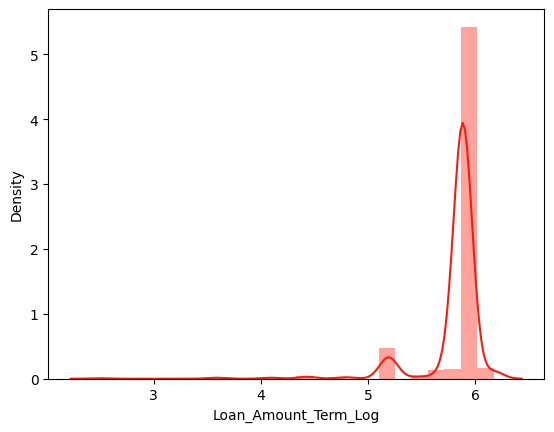

In [30]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'], color='#FF1909')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13552\3008890976.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Income_Log'])


<Axes: xlabel='Total_Income_Log', ylabel='Density'>

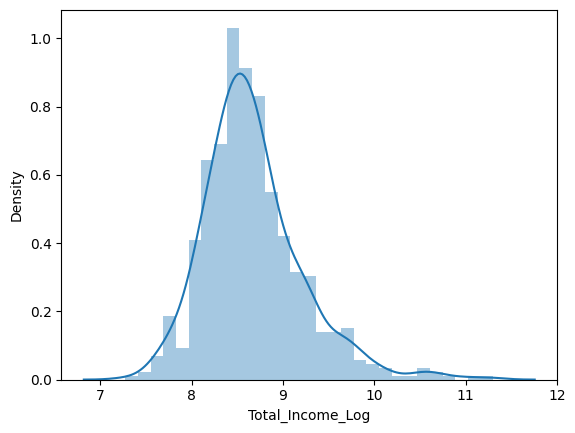

In [31]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_Log'])

# Correlation Matrix

In [32]:
corr = df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = "BuPu")

ValueError: could not convert string to float: 'Graduate'

In [33]:
df.head()

,Sr_no,Cases,Education,Applicant_Income,Family_Income,Total_assets,Business_type,Credit,Loan_Amount,Loan_Amount_Term,...,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status,Total_Income,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,1,Graduate,5849,0.0,0,Yes,Yes,146.412162,360.0,...,6,4,0,0,Y,5849.0,8.674026,4.986426,5.886104,8.674026
1,2,2,Graduate,4583,1508.0,3,No,Yes,128.000000,360.0,...,1,1,1,1,N,6091.0,8.430109,4.852030,5.886104,8.714568
2,3,0,Graduate,3000,0.0,0,No,Yes,66.000000,360.0,...,2,3,4,1,Y,3000.0,8.006368,4.189655,5.886104,8.006368
3,4,0,Not Graduate,2583,2358.0,2,Yes,No,120.000000,360.0,...,7,4,5,1,Y,4941.0,7.856707,4.787492,5.886104,8.505323
4,5,2,Graduate,6000,0.0,2,Yes,Yes,141.000000,360.0,...,2,2,0,2,Y,6000.0,8.699515,4.948760,5.886104,8.699515


In [34]:
# drop unnecessary columns
cols = ['Applicant_Income', 'Family_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Total_Income', 'Sr_no']
df = df.drop(columns = cols, axis =  1)
df.head()

,Cases,Education,Total_assets,Business_type,Credit,Rating_Reviewportal,Daily_Sales,Competition,Rent_Wages,Size_Shop,...,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,Graduate,0,Yes,Yes,5,0,3,1,3,...,3,6,4,0,0,Y,8.674026,4.986426,5.886104,8.674026
1,2,Graduate,3,No,Yes,2,1,0,5,0,...,5,1,1,1,1,N,8.430109,4.852030,5.886104,8.714568
2,0,Graduate,0,No,Yes,2,5,1,4,0,...,5,2,3,4,1,Y,8.006368,4.189655,5.886104,8.006368
3,0,Not Graduate,2,Yes,No,3,1,0,3,2,...,3,7,4,5,1,Y,7.856707,4.787492,5.886104,8.505323
4,2,Graduate,2,Yes,Yes,5,1,0,4,3,...,3,2,2,0,2,Y,8.699515,4.948760,5.886104,8.699515


# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
cols = ['Education', 'Loan_Status', 'Business_type', 'Credit']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Cases,Education,Total_assets,Business_type,Credit,Rating_Reviewportal,Daily_Sales,Competition,Rent_Wages,Size_Shop,...,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,1,1,5,0,3,1,3,...,3,6,4,0,0,1,8.674026,4.986426,5.886104,8.674026
1,2,0,3,0,1,2,1,0,5,0,...,5,1,1,1,1,0,8.430109,4.852030,5.886104,8.714568
2,0,0,0,0,1,2,5,1,4,0,...,5,2,3,4,1,1,8.006368,4.189655,5.886104,8.006368
3,0,1,2,1,0,3,1,0,3,2,...,3,7,4,5,1,1,7.856707,4.787492,5.886104,8.505323
4,2,0,2,1,1,5,1,0,4,3,...,3,2,2,0,2,1,8.699515,4.948760,5.886104,8.699515


In [37]:
# specify input and output attribute
x = df.drop(columns = ['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [38]:
x
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Train-Test Split

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [40]:
y_test.value_counts()

Loan_Status
1    101
0     53
Name: count, dtype: int64

In [41]:
y_train.value_counts()

Loan_Status
1    321
0    139
Name: count, dtype: int64

# Model Training

In [42]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)
    model.fit(x_train, y_train)
    print("Accuracy is ", model.score(x_test, y_test)*100)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy is  66.23376623376623


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is  56.493506493506494


In [45]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is  65.5844155844156


In [46]:
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
y_pred = model.predict(x_test)

In [48]:
score = model.score(x_train, y_train)
print("Accuracy =", score*100)

Accuracy = 99.99933900339333


In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.23235932753513205

In [50]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred.round())
cm

array([[12, 41],
       [15, 86]], dtype=int64)

# Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made

<Axes: >

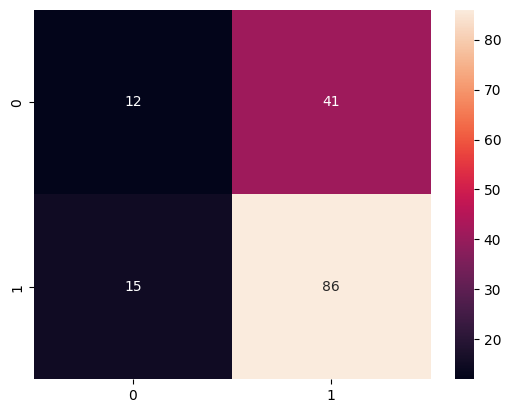

In [51]:
sns.heatmap(cm, annot = True)

In [52]:
y_train.value_counts()

Loan_Status
1    321
0    139
Name: count, dtype: int64

# Saving the Model

In [53]:
import pickle
saved_model = pickle.dumps(model)
saved_model_from_pickle = pickle.loads(saved_model)
saved_model_from_pickle.predict(x_test)

array([ 0.67331785,  0.8738201 ,  0.420843  ,  0.87868553,  0.5868484 ,
        0.8753558 ,  0.32790014,  0.8063717 ,  0.6511205 ,  0.87290096,
        1.0381795 ,  0.66120756,  0.7453769 ,  0.92449254,  0.83225507,
        0.70987374,  0.65514964,  0.9560579 ,  0.86113757,  0.92516166,
        0.71325296,  0.86092913,  0.62874776,  0.9794627 ,  0.74850523,
        0.58306706, -0.16227363,  0.737698  ,  0.51841   ,  0.84553194,
        0.80416197,  0.76112205,  0.71308184,  0.93095815,  0.8218145 ,
        0.84747887,  0.71756214,  0.9307593 ,  0.9756782 ,  0.74092174,
        0.8836733 ,  0.5454159 ,  0.84349227,  0.27560428,  0.78794986,
        0.8573883 ,  0.68563455,  0.92815197,  0.34012282,  0.51897895,
        0.74167573,  0.81441915,  0.56283885,  0.4510619 ,  0.65222305,
        0.67655694,  0.50933826,  0.6247415 ,  0.74004775,  1.0662248 ,
        0.65490204,  0.5175595 ,  0.29363316,  0.01504921,  0.9511619 ,
        0.6955627 ,  0.58722794,  0.8400751 ,  0.750638  ,  0.60

In [54]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']